In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

dF_stores=pd.read_csv('stores.csv')
dF_products=pd.read_csv('products.csv')
dF_customers=pd.read_csv('customers.csv')
dF_tickets=pd.read_csv('tickets.csv')

data = dF_tickets.merge(dF_customers, on="customerid", how = 'inner')
#data = data.merge(dF_products, on="productid", how = 'inner')
#data = data.merge(dF_stores, on="storeid", how = 'inner')

data['datekey']=pd.to_datetime(dF_tickets['datekey'],format="%Y-%m-%d")
data['weekday'] = data['datekey'].apply(lambda x: dt.datetime.strftime(x, '%A'))
tickets = pd.DataFrame(data.groupby('ticketid')['extendedamount'].sum())
tickets = tickets.merge(data[['ticketid', 'age', 'gender', 'customerid']], on="ticketid", how = 'inner').drop_duplicates()

In [10]:
tickets.head()

,ticketid,extendedamount,age,gender,customerid
0,100002631201903141011,12.94,63.0,F,77340000000249293
6,100002631201903141014,22.37,49.0,F,77340000000022507
22,100002631201903141017,25.53,NaN,NaN,77000000086087334
38,100002631201903141020,29.29,24.0,F,77000000177655528
68,100002631201903141032,4.33,37.0,F,77340000000159762


In [85]:
data2 = pd.DataFrame()
data2['numero_compras'] = tickets.customerid.value_counts()
data2['numero_compras'].tail()

77340000020594170    1
77000000256709752    1
77000000120585093    1
77000000194981959    1
77340000025585111    1
Name: numero_compras, dtype: int64

In [86]:
data2['gasto_total'] = tickets.groupby('customerid')['extendedamount'].sum()
data2['gasto_total'].tail()

77340000020594170     60.95
77000000256709752    408.88
77000000120585093      9.05
77000000194981959      9.65
77340000025585111     12.74
Name: gasto_total, dtype: float64

(0, 40)

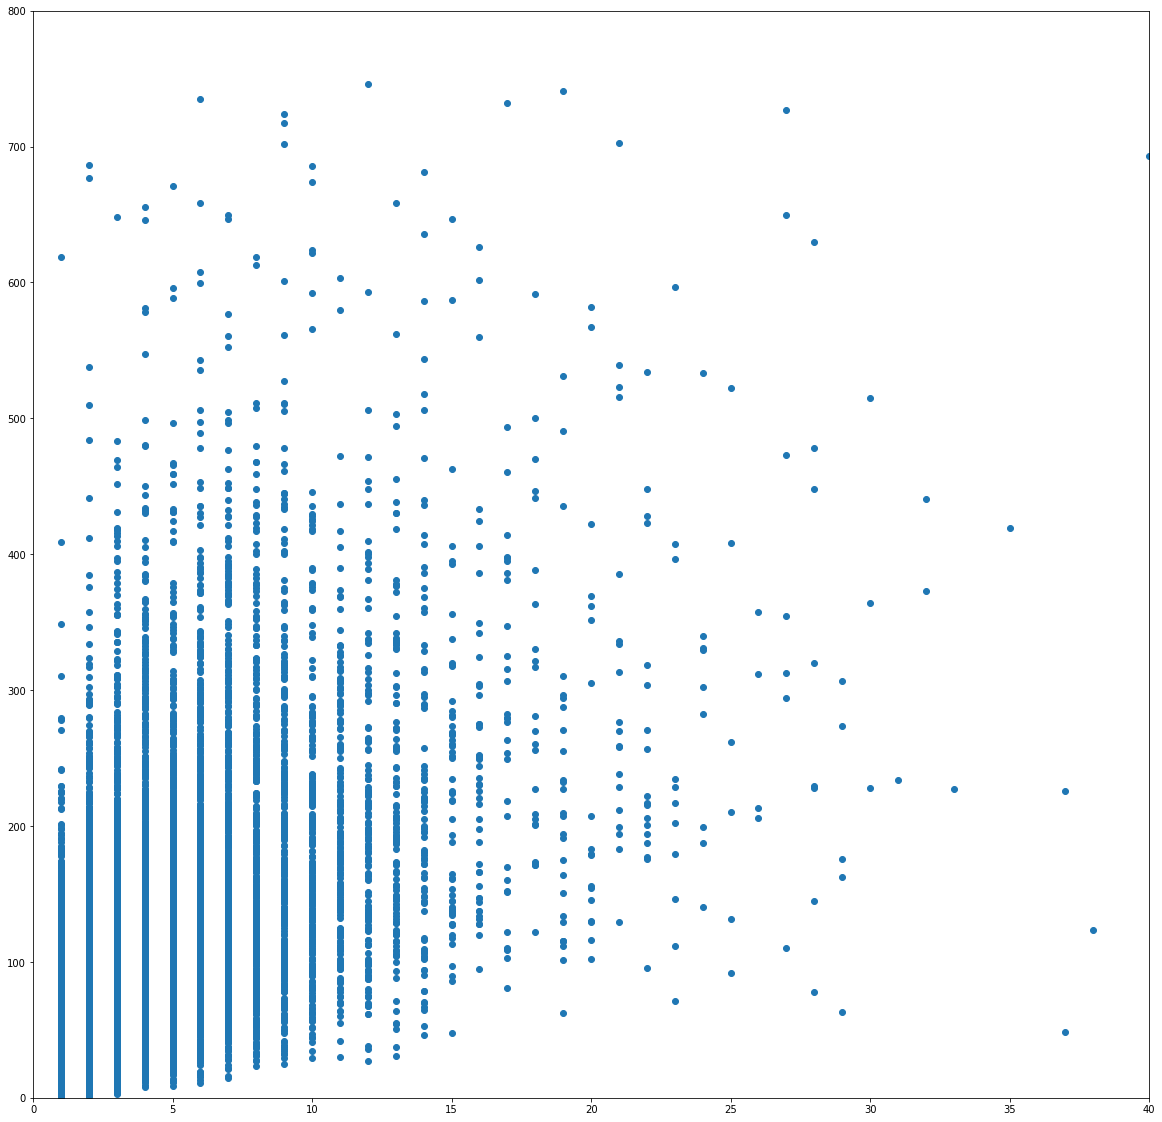

In [88]:
plt.rcParams['figure.figsize'] =[20, 20]
plt.scatter(data2['numero_compras'], data2['gasto_total'], cmap='rainbow')
plt.ylim((0, 800))
plt.xlim((0, 40))